In [10]:
"""
import library
"""
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [11]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
"""
A simple method that we can use is to split the ordered dataset into train and test datasets. The code below
calculates the index of the split point and separates the data into the training datasets with 67% of the
observations that we can use to train our model, leaving the remaining 33% for testing the model.
"""

'\nA simple method that we can use is to split the ordered dataset into train and test datasets. The code below\ncalculates the index of the split point and separates the data into the training datasets with 67% of the\nobservations that we can use to train our model, leaving the remaining 33% for testing the model.\n'

In [12]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#print "train_data_size: " + str(len(train)), " test_data_size: " + str(len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
	    a = dataset[i:(i+look_back), 0]
	    dataX.append(a)
	    dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

""" The network has a visible layer with 1 input, a hidden layer with
4 LSTM blocks or neurons and an output layer that makes a single value
prediction. The default sigmoid activation function is used for the
LSTM blocks. The network is trained for 100 epochs and a batch size of
1 is used."""

' The network has a visible layer with 1 input, a hidden layer with\n4 LSTM blocks or neurons and an output layer that makes a single value\nprediction. The default sigmoid activation function is used for the\nLSTM blocks. The network is trained for 100 epochs and a batch size of\n1 is used.'

In [13]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
 - 1s - loss: 0.0405
Epoch 2/100
 - 0s - loss: 0.0200
Epoch 3/100
 - 0s - loss: 0.0146
Epoch 4/100
 - 0s - loss: 0.0135
Epoch 5/100
 - 0s - loss: 0.0124
Epoch 6/100
 - 0s - loss: 0.0116
Epoch 7/100
 - 0s - loss: 0.0106
Epoch 8/100
 - 0s - loss: 0.0096
Epoch 9/100
 - 0s - loss: 0.0086
Epoch 10/100
 - 0s - loss: 0.0075
Epoch 11/100
 - 0s - loss: 0.0066
Epoch 12/100
 - 0s - loss: 0.0056
Epoch 13/100
 - 0s - loss: 0.0049
Epoch 14/100
 - 0s - loss: 0.0041
Epoch 15/100
 - 0s - loss: 0.0035
Epoch 16/100
 - 0s - loss: 0.0030
Epoch 17/100
 - 0s - loss: 0.0027
Epoch 18/100
 - 0s - loss: 0.0024
Epoch 19/100
 - 0s - loss: 0.0022
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0020
Epoch 22/100
 - 0s - loss: 0.0020
Epoch 23/100
 - 0s - loss: 0.0020
Epoch 24/100
 - 0s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0019
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0019
Epoch 29/100
 - 0s - loss: 0.0019
Epoch 30/100
 - 0s - lo

In [14]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print(trainY[0])
print(trainPredict[:,0])
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(testY[0])
print(testPredict[:,0])
print('Test Score: %.2f RMSE' % (testScore))

[ 117.99999916  131.99999879  129.00000163  120.99999632  135.00000368
  147.99999397  147.99999397  136.00000531  119.00000078  103.99999952
  117.99999916  115.00000199  125.99999674  140.99999801  135.00000368
  125.00000283  148.9999956   169.99999891  169.99999891  157.99999481
  133.00000042  114.00000036  139.99999638  145.00000452  149.99999723
  177.9999965   163.00000295  172.00000217  177.9999965   198.99999982
  198.99999982  184.00000627  162.00000133  146.00000615  165.9999924
  171.00000054  179.99999976  193.00000549  181.00000139  183.00000464
  217.99999988  230.00000398  241.99999264  209.00000066  191.00000223
  172.00000217  194.00000712  195.99999493  195.99999493  235.99999831
  234.99999668  229.00000235  242.99999427  263.99999759  272.00001061
  236.99999994  211.00000392  179.99999976  201.00000308  203.99999252
  187.99999735  234.99999668  226.9999991   233.99999506  263.99999759
  301.99999771  292.99999849  259.00000488  229.00000235  203.00000633
  229.0

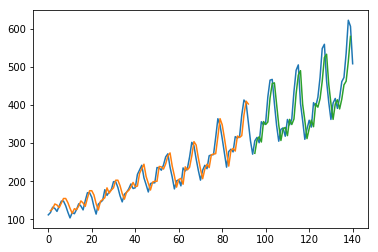

In [22]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()